In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sys.path.append(os.path.abspath('./scripts'))

In [2]:
from load_data import load_data_from_postgres, load_data_using_sqlalchemy

In [3]:
# to define my sql query
query = "SELECT * FROM xdr_data;"
# to load data from postgreSQL
df = load_data_from_postgres(query)
# to display the first few rows
if df is not None:
    print("Successfully loaded the data")
else:
    print("failed to load data")

d:\Week2\scripts\load_data.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data


In [4]:
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.304243e+19,4/24/2019 1:44,590.0,4/25/2019 1:44,569.0,86399.0,2.082014e+14,3.366221e+10,8.637690e+13,T79668A,...,13875034.0,12290454.0,9399575.0,16458987.0,674326215.0,284351.0,148753520.0,9417573.0,41322970.0,705065080.0
1,1.304243e+19,4/24/2019 1:44,16.0,4/25/2019 1:44,918.0,86399.0,2.082014e+14,3.366056e+10,8.654080e+13,D72351A,...,15252976.0,18781327.0,18483519.0,3459528.0,550946413.0,7551233.0,152996851.0,4261091.0,37928376.0,598836264.0
2,1.304243e+19,4/24/2019 1:44,973.0,4/25/2019 1:44,918.0,86399.0,2.082019e+14,3.366064e+10,8.637690e+13,T29828B,...,3789706.0,1682506.0,19607531.0,13836022.0,559198116.0,14948182.0,185219340.0,10461520.0,43444681.0,585578621.0
3,7.277826e+18,4/24/2019 1:44,963.0,4/25/2019 1:44,920.0,86399.0,2.082014e+14,3.366773e+10,8.654080e+13,T93628A,...,10835641.0,6675284.0,9666478.0,21503146.0,342114009.0,2126653.0,148858060.0,3410442.0,37179109.0,370330555.0
4,1.304243e+19,4/24/2019 1:44,762.0,4/25/2019 1:51,956.0,86800.0,2.082017e+14,3.366030e+10,8.637690e+13,D88936B,...,6034506.0,7712577.0,489980.0,9688000.0,824067578.0,8871313.0,642283920.0,10102282.0,37402852.0,846336014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,1.304243e+19,4/24/2019 1:44,832.0,4/25/2019 1:44,675.0,86399.0,2.082014e+14,3.366118e+10,8.637690e+13,D73896B,...,20320828.0,18236790.0,18255232.0,11680555.0,148233704.0,4128108.0,574261022.0,7697390.0,42986154.0,197728847.0
149997,1.311448e+19,4/24/2019 1:44,143.0,4/24/2019 23:34,985.0,78608.0,2.082017e+14,3.367895e+10,3.548671e+13,9.16456701116877E+015,...,22956744.0,15032390.0,5182075.0,11239855.0,306489304.0,14058904.0,178937458.0,11748158.0,53685160.0,349011120.0
149998,1.304243e+19,4/24/2019 1:44,854.0,4/25/2019 1:36,615.0,85909.0,2.082009e+14,3.369828e+10,8.637690e+13,T93672A,...,17443476.0,15445096.0,14688248.0,10111457.0,322211285.0,13699351.0,808915984.0,1206176.0,41941191.0,365990354.0
149999,1.304243e+19,4/24/2019 1:44,251.0,4/25/2019 1:44,176.0,86399.0,2.082019e+14,3.365809e+10,8.637690e+13,T78892A,...,12708171.0,9772130.0,6483549.0,8275296.0,212005224.0,1093626.0,625772175.0,10158040.0,32985042.0,237209367.0


In [5]:
# to Display Columns Data Type
print("Column Data Types:")
print(df.dtypes)

Column Data Types:
Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               f

In [6]:
# to Identify Missing Values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 Bearer Id                                      991
Start                                            1
Start ms                                         1
End                                              1
End ms                                           1
Dur. (ms)                                        1
IMSI                                           570
MSISDN/Number                                 1066
IMEI                                           572
Last Location Name                            1153
Avg RTT DL (ms)                              27829
Avg RTT UL (ms)                              27812
Avg Bearer TP DL (kbps)                          1
Avg Bearer TP UL (kbps)                          1
TCP DL Retrans. Vol (Bytes)                  88146
TCP UL Retrans. Vol (Bytes)                  96649
DL TP < 50 Kbps (%)                            754
50 Kbps < DL TP < 250 Kbps (%)                 754
250 Kbps < DL TP < 1 Mbps (%)                  754
DL TP > 1 Mbps

In [7]:
column_name = 'Handset Type'
if column_name in df.columns and df[column_name].dtype == 'object':
    # Calculate value counts
    value_counts = df[column_name].value_counts()
    print(f"Value Counts for {column_name}:\n", value_counts)

    # Define a threshold for rarity categories with fewer than 5 occurrences
    threshold = 5
    rare_categories = value_counts[value_counts < threshold]
    
    if not rare_categories.empty:
        print(f"\nRare categories in '{column_name}':\n", rare_categories)
    else:
        print(f"\nNo rare categories found in '{column_name}'.")
else:
    print(f"Column '{column_name}' does not exist or is not an object type.")

Value Counts for Handset Type:
 Handset Type
Huawei B528S-23A                                 19752
Apple iPhone 6S (A1688)                           9419
Apple iPhone 6 (A1586)                            9023
undefined                                         8987
Apple iPhone 7 (A1778)                            6326
                                                 ...  
Huawei Bln-Al10                                      1
Samsung Galaxy S4 (Sgh-I337M)                        1
Leagoo Intl Co. . Leagoo Lead 6 Lead 5 Lead 7        1
Sierra Wireless Airprime Q2687                       1
Samsung Galaxy J2 Core Sm-J260F Ds                   1
Name: count, Length: 1396, dtype: int64

Rare categories in 'Handset Type':
 Handset Type
Wiko Global Sasu Wiko Sunset                           4
Tct Mobile Suzho. Alcatel One Touch 6030X              4
Oneplus Technolo. One A1001 Oneplus A0001 One A0001    4
Lenovo D012064645                                      4
Neel Enterprise Kolor Crosscallt

In [8]:
# Define a threshold for rarity
threshold = 5
# to create a value count series
value_counts = df[column_name].value_counts()
# Combine rare categories into 'Other'
df[column_name] = df[column_name].apply(
    lambda x: x if pd.notnull(x) and value_counts.get(x, 0) >= threshold else 'Other')

# Check the new value counts
new_value_counts = df[column_name].value_counts()
print("\nNew Value Counts after combining rare categories:\n", new_value_counts)


New Value Counts after combining rare categories:
 Handset Type
Huawei B528S-23A                                                    19752
Apple iPhone 6S (A1688)                                              9419
Apple iPhone 6 (A1586)                                               9023
undefined                                                            8987
Apple iPhone 7 (A1778)                                               6326
                                                                    ...  
Sony Mobile Comm. Sony D2105                                            5
Samsung Galaxy Tab S3 (Sm-T825)                                         5
Microsoft Mobile. Microsoft Rm-1099 Microsoft Lumia 435 Dual Sim        5
Apple iPhone Xs (A2100)                                                 5
Wiko Global Sasu Wiko Robby                                             5
Name: count, Length: 478, dtype: int64


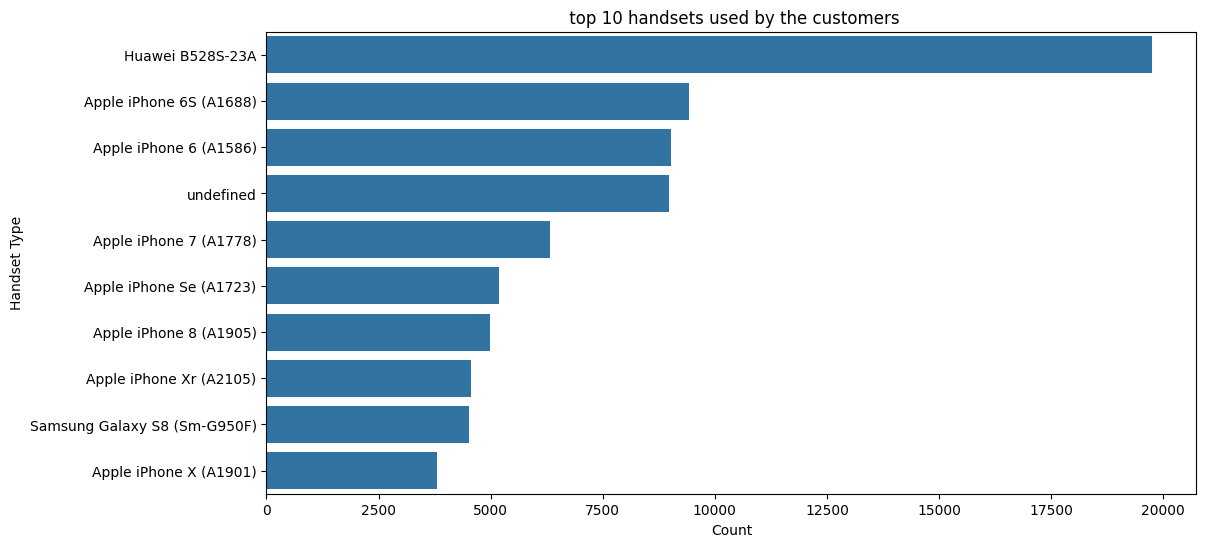

In [9]:
# Plot the value counts of the handset types
plt.figure(figsize=(12, 6))
sns.countplot(y=df[column_name], order=df[column_name].value_counts().index[:10])  # Top 10 categories
plt.title(' top 10 handsets used by the customers')
plt.xlabel('Count')
plt.ylabel('Handset Type')
plt.show()

In [11]:
# to identify the top 3 handset manufacturers
# Specify the column containing handset manufacturer
column_name = 'Handset Manufacturer'  

# Check if the column exists
if column_name in df.columns:
    # Extract manufacturers (assuming they are the first word in the handset manufacturer)
    df['Manufacturer'] = df[column_name].str.split().str[0]
    
    # Get the top 3 manufacturers
    top_manufacturers = df['Manufacturer'].value_counts().head(3)
    
    # Display the top 3 manufacturers
    print("Top 3 Handset Manufacturers:\n", top_manufacturers)
else:
    print(f"Column '{column_name}' does not exist in the DataFrame.")

Top 3 Handset Manufacturers:
 Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64
